# Explore observation data

* In-situ (buoy/station) data
    - Water level
* Satellite altimetry data (water level)

Note: The MIKE IO and ModelSkill packages are used here for convenient plotting functionality. They are not required for working with the observation data. 

In [26]:
import pandas as pd
import mikeio
import modelskill as ms
import helper as h
import matplotlib.pyplot as plt

In [30]:
fldr = "../data-preprocessing/" 
obs_fldr = "../observations/" 
msh = mikeio.open("../input/Mesh_8000_elems.mesh")

stations = 'stations.txt'

## In-situ stations

Note: some station coordinates have been moved to fit within the model domain.

In [28]:
df_stn = pd.read_csv(fldr + "stations.csv", index_col=0)
df_stn

,lat,lon
station,,
AkkaertSouthwestBuoy,51.41600,2.81900
WaddenEierlandseGat,53.27694,4.66167
DeutscheBuchtBuoy,54.29664,5.79447
Fanoebugt,55.34600,8.23000
KeetenBoei,51.60800,3.96600
MaeslantkeringZeezijdeNoordMeetpaal,51.96100,4.15900
NorderneyBuoy,53.74950,7.11865
Nymindegab,55.81000,7.94100
OverloopVanValkenisse,51.37151,4.13717


## Water level stations

In [38]:
q = ms.Quantity(name="Wave height", unit="meter")
whlist = []

In [57]:
for i, row in df_stn.iterrows():
    df = pd.read_csv(obs_fldr + f"{i}.csv", index_col=0)
    df.index = pd.to_datetime(df.index, format="ISO8601")
    o = ms.PointObservation(df.VHM0, x=3, y = 50, name=i, quantity=q)
    whlist.append(o)


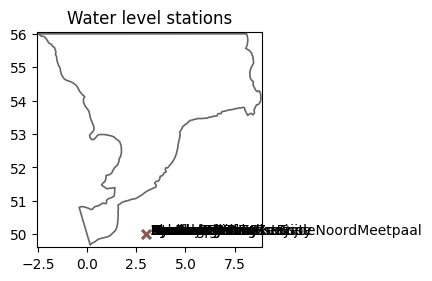

In [60]:
ms.plotting.spatial_overview(whlist, mod=msh.geometry,figsize=(4,4));
plt.tight_layout()
plt.title("Water level stations")
plt.savefig("../figures/stations.png")

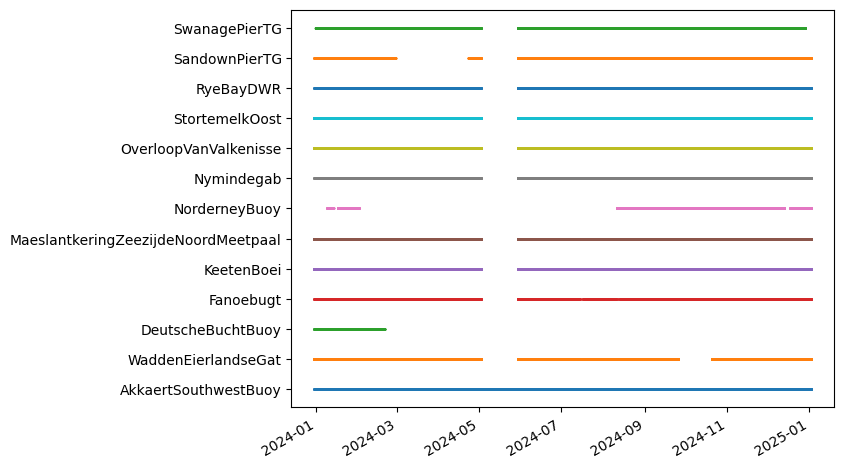

In [50]:
ms.plotting.temporal_coverage(whlist);

# Current stations

In [10]:
ulist, vlist = h.get_u_v_point_obs()

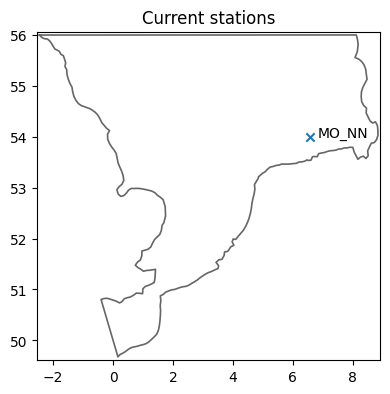

In [11]:
ms.plotting.spatial_overview(ulist, mod=msh.geometry,figsize=(4,4));
plt.tight_layout()
plt.title("Current stations")
plt.savefig("../figures/stations_currents.png")

## Altimetry 

In [12]:
altlist = h.get_altimetry_obs(quality=None)

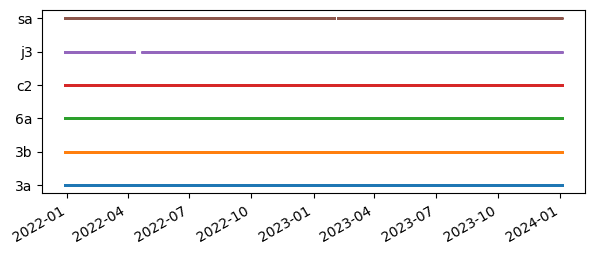

In [13]:
ms.plotting.temporal_coverage(altlist);

In [14]:
altlist_jan22 = [al.sel(time=slice("2022-01-01","2022-01-31")) for al in altlist]    

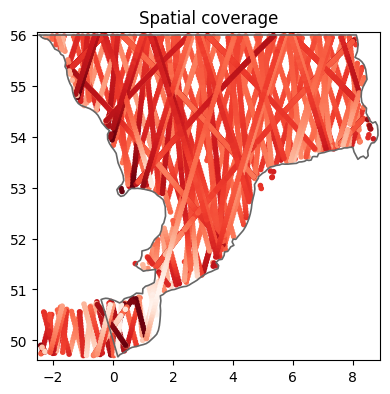

In [15]:
ms.plotting.spatial_overview(altlist_jan22, mod=msh.geometry,figsize=(4,4));
plt.tight_layout()
plt.savefig("../figures/altimetry_coverage.png")